# Importation des modules

In [1]:
# Pour manipuler et visualider des données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# #Pour générer automatiquement un rapport détaillé de l'analyse des données
import sweetviz as sv

# pour générer une carte
import folium
import geopandas as gpd
from IPython.display import display

import json

# Préparation des données

In [2]:
df = pd.read_csv("AnalysePat/dfClean.csv")
df.head(5)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  totalPrice  review_score  \
0  2017-09-19 09:45:35   58.90          13.29       72.19           5.0   
1  2017-05-03 11:05:13  239.90          19.93      259.83           4.0   
2  2018-01-18 14:48:30  199.00          17.87      216.87           5.0   
3  2018-08-15 10:10:18   12.99          12.79       25.78           4.0   
4  2017-02-13 13:57:51  199.90          18.14      218.04           5.0   

                        customer_id payment_type  customer_zip_code_prefix  \
0  3ce436f183e68e07877b285a838db11a  credit_card                     28013   
1  f6dd3ec061db4e3987629fe6b26e5cce  credit_card                     15775   
2  6489ae5e4333f3693df5ad4372dab6d3  credit_card                     35661   
3  d4eb9395c8c0431ee92fce09860c5a06  credit_card                     12952   
4  58dbd0b2d70206bf40e62cd34e84d795  credit_card                     13226   

           customer_city customer_state  seller_zip_code_prefix  \
0  campos dos goytacazes             RJ                   27277   
1        santa fe do sul             SP                    3471   
2          para de minas             MG                   37564   
3                atibaia             SP                   14403   
4        varzea paulista             SP                   87900   

     seller_city seller_state product_category_name  
0  volta redonda           SP                Gadget  
1      sao paulo           SP            Animalerie  
2  borda da mata           MG             Furniture  
3         franca           SP        Parfum et soin  
4         loanda           PR           Quincalerie

In [3]:
df

order_id  order_item_id  \
0      00010242fe8c5a6d1ba2dd792cb16214              1   
1      00018f77f2f0320c557190d7a144bdd3              1   
2      000229ec398224ef6ca0657da4fc703e              1   
3      00024acbcdf0a6daa1e931b038114c75              1   
4      00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                 ...            ...   
99656  fffc94f6ce00a00581880bf54a75a037              1   
99657  fffcd46ef2263f404302a634eb57f7eb              1   
99658  fffce4705a9662cd70adb13d4a31832d              1   
99659  fffe18544ffabc95dfada21779c9644f              1   
99660  fffe41c64501cc87c801fd61db3f6244              1   

                             product_id                         seller_id  \
0      4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1      e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2      c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3      7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4      ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                 ...                               ...   
99656  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
99657  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
99658  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
99659  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
99660  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

       shipping_limit_date   price  freight_value  totalPrice  review_score  \
0      2017-09-19 09:45:35   58.90          13.29       72.19           5.0   
1      2017-05-03 11:05:13  239.90          19.93      259.83           4.0   
2      2018-01-18 14:48:30  199.00          17.87      216.87           5.0   
3      2018-08-15 10:10:18   12.99          12.79       25.78           4.0   
4      2017-02-13 13:57:51  199.90          18.14      218.04           5.0   
...                    ...     ...            ...         ...           ...   
99656  2018-05-02 04:11:01  299.99          43.41      343.40           5.0   
99657  2018-07-20 04:31:48  350.00          36.53      386.53           5.0   
99658  2017-10-30 17:14:25   99.90          16.95      116.85           5.0   
99659  2017-08-21 00:04:32   55.99           8.72       64.71           5.0   
99660  2018-06-12 17:10:13   43.00          12.79       55.79           5.0   

                            customer_id payment_type  \
0      3ce436f183e68e07877b285a838db11a  credit_card   
1      f6dd3ec061db4e3987629fe6b26e5cce  credit_card   
2      6489ae5e4333f3693df5ad4372dab6d3  credit_card   
3      d4eb9395c8c0431ee92fce09860c5a06  credit_card   
4      58dbd0b2d70206bf40e62cd34e84d795  credit_card   
...                                 ...          ...   
99656  b51593916b4b8e0d6f66f2ae24f2673d       boleto   
99657  84c5d4fbaf120aae381fad077416eaa0       boleto   
99658  29309aa813182aaddc9b259e31b870e6  credit_card   
99659  b5e6afd5a41800fdf401e0272ca74655  credit_card   
99660  96d649da0cc4ff33bb408b199d4c7dcf  credit_card   

       customer_zip_code_prefix          customer_city customer_state  \
0                         28013  campos dos goytacazes             RJ   
1                         15775        santa fe do sul             SP   
2                         35661          para de minas             MG   
3                         12952                atibaia             SP   
4                         13226        varzea paulista             SP   
...                         ...                    ...            ...   
99656                     65077               sao luis             MA   
99657                     81690               curitiba             PR   
99658                      4039              sao paulo             SP   
99659                     13289                vinhedo   

In [4]:
# Statistiques de base sur les colonnes numériques
df[["price", "freight_value", "totalPrice",	"review_score"]].describe()

price  freight_value    totalPrice  review_score
count  99661.000000   99661.000000  99661.000000  99661.000000
mean     136.376785      22.688784    159.065569      4.104876
std      207.120377      20.886612    216.601375      1.331166
min        0.850000       0.000000      9.590000      1.000000
25%       45.900000      13.750000     61.750000      4.000000
50%       85.000000      17.100000    104.170000      5.000000
75%      149.900000      23.720000    176.160000      5.000000
max    13440.000000    1002.300000  13664.080000      5.000000

In [5]:
# Dictionnaire pour stocker les correspondances entre les abréviations et les noms complets des états
state_dict = {
    'RJ': 'Rio de Janeiro',
    'SP': 'São Paulo',
    'MG': 'Minas Gerais',
    'PR': 'Paraná',
    'GO': 'Goiás',
    'BA': 'Bahia',
    'AL': 'Alagoas',
    'MS': 'Mato Grosso do Sul',
    'CE': 'Ceará',
    'DF': 'District fédéral (Brasília)',
    'RS': 'Rio Grande do Sul',
    'PE': 'Pernambuco',
    'SC': 'Santa Catarina',
    'MA': 'Maranhão',
    'PA': 'Pará',
    'MT': 'Mato Grosso',
    'ES': 'Espírito Santo',
    'PB': 'Paraíba',
    'AM': 'Amazonas',
    'AP': 'Amapá',
    'PI': 'Piauí',
    'TO': 'Tocantins',
    'RO': 'Rondônia',
    'SE': 'Sergipe',
    'RN': 'Rio Grande do Norte',
    'AC': 'Acre',
    'RR': 'Roraima'
}

In [6]:
# On applique le dictionnaire aux colonnes voulues
df['seller_state'] = df['seller_state'].map(state_dict)
df['customer_state'] = df['customer_state'].map(state_dict)

In [7]:
df['seller_state'].head(5)

0       São Paulo
1       São Paulo
2    Minas Gerais
3       São Paulo
4          Paraná
Name: seller_state, dtype: object

In [8]:
df['customer_state'].head(5)

0    Rio de Janeiro
1         São Paulo
2      Minas Gerais
3         São Paulo
4         São Paulo
Name: customer_state, dtype: object

# Analyse univariée

In [9]:
# # Utiliser sweetviz pour générer un rapport
# report = sv.analyze(df)

# # Afficher le rapport
# report.show_html()

On visualise nos données numériques :

In [10]:
df.select_dtypes(["int64","float64"])

order_item_id   price  freight_value  totalPrice  review_score  \
0                  1   58.90          13.29       72.19           5.0   
1                  1  239.90          19.93      259.83           4.0   
2                  1  199.00          17.87      216.87           5.0   
3                  1   12.99          12.79       25.78           4.0   
4                  1  199.90          18.14      218.04           5.0   
...              ...     ...            ...         ...           ...   
99656              1  299.99          43.41      343.40           5.0   
99657              1  350.00          36.53      386.53           5.0   
99658              1   99.90          16.95      116.85           5.0   
99659              1   55.99           8.72       64.71           5.0   
99660              1   43.00          12.79       55.79           5.0   

       customer_zip_code_prefix  seller_zip_code_prefix  
0                         28013                   27277  
1                         15775                    3471  
2                         35661                   37564  
3                         12952                   14403  
4                         13226                   87900  
...                         ...                     ...  
99656                     65077                   88303  
99657                     81690                    1206  
99658                      4039                   80610  
99659                     13289                    4733  
99660                     18605                   14940  

[99661 rows x 7 columns]

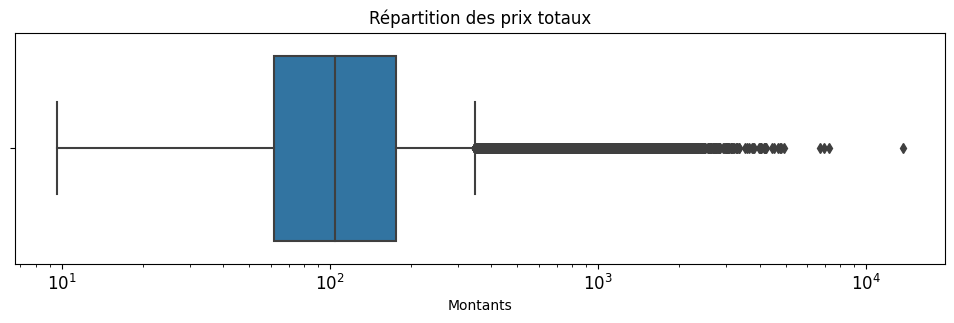

In [11]:
# Boxplot des prix totaux
plt.figure(figsize=(12,3))

plt.title("Répartition des prix totaux")

sns.boxplot(x="totalPrice", data=df, )

plt.xlabel("Montants")
plt.xscale('log')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

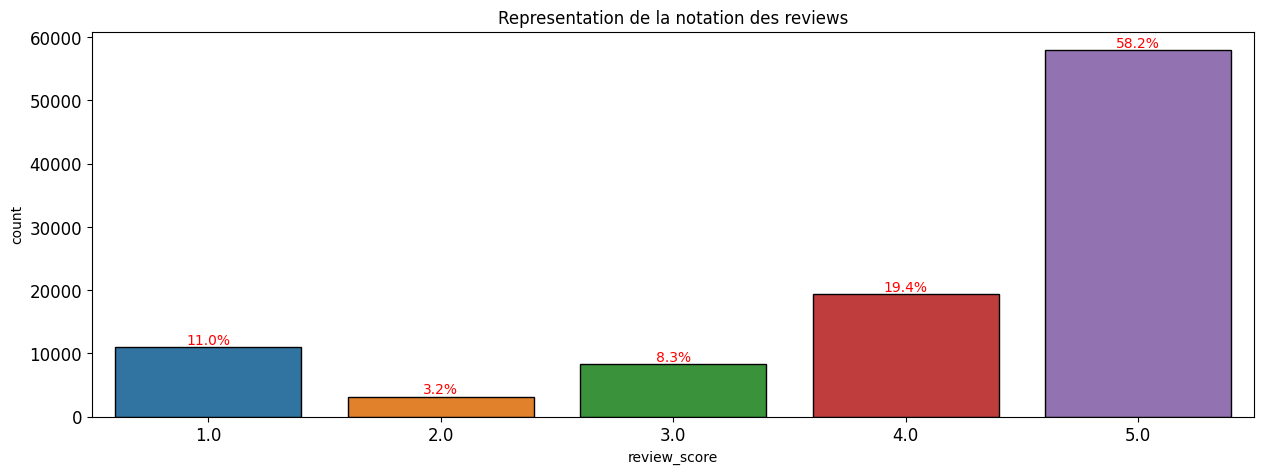

In [12]:
# Répartition des notes
plt.figure(figsize=(15,5))

plt.title("Representation de la notation des reviews")
plt.xlabel('reviews')
plt.ylabel('nombre')

ax = sns.countplot(x='review_score', data=df, edgecolor='k', linewidth=1)

for p in ax.patches:
    height = p.get_height()
    percentage = height / len(df['review_score']) * 100
    ax.text(p.get_x() + p.get_width()/2., height, '%.1f%%' % percentage, fontsize=10, color='red', ha='center', va='bottom')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# Analyse bivariée

### Ventes par catégorie

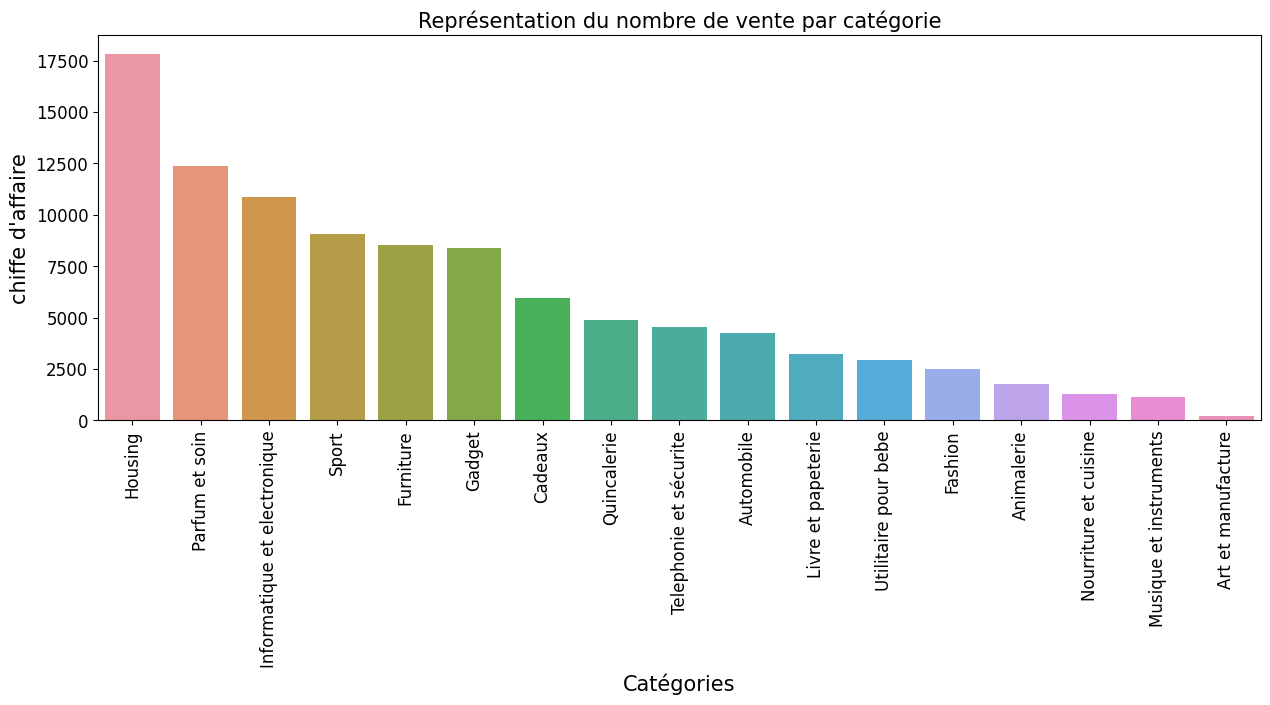

In [13]:
plt.figure(figsize=(15,5))

plt.title("Représentation du nombre de vente par catégorie", fontsize=15)

sns.countplot(x='product_category_name', data=df, orient='v', order=df['product_category_name'].value_counts().index)
plt.xticks(rotation = 90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Catégories', fontsize=15)
plt.ylabel("chiffe d'affaire", fontsize=15)

plt.show()

### Types de paiement par catégorie

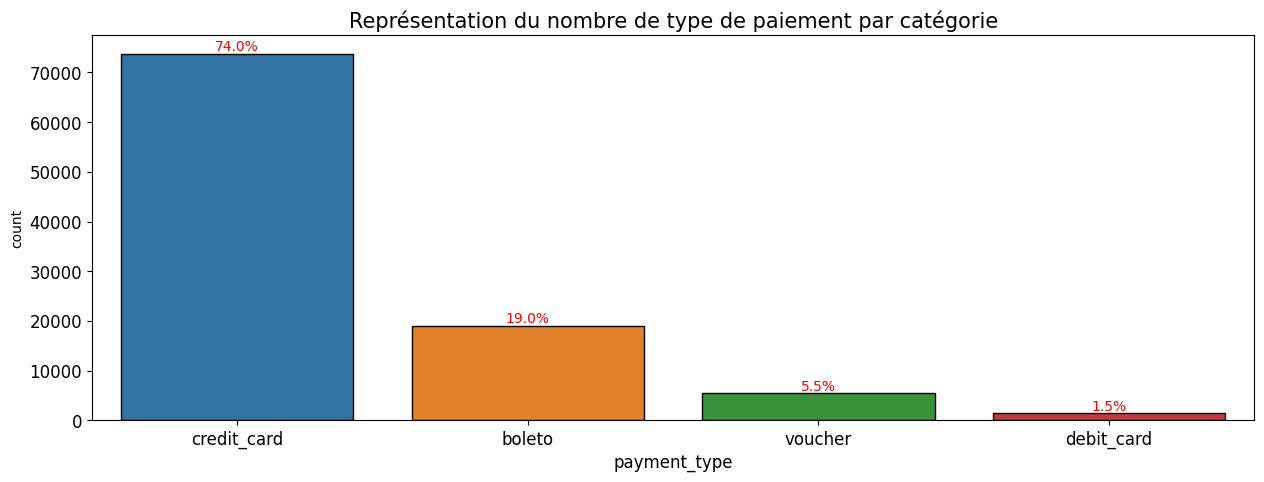

In [14]:
plt.figure(figsize=(15,5))

plt.title("Représentation du nombre de type de paiement par catégorie", fontsize=15)
plt.xlabel('Catégories', fontsize=12)
ax = sns.countplot(x='payment_type', data=df, orient='v', order=df['payment_type'].value_counts().index, edgecolor='k', linewidth=1)

for p in ax.patches:
    height = p.get_height()
    percentage = height / len(df['payment_type']) * 100
    ax.text(p.get_x() + p.get_width()/2., height, '%.1f%%' % percentage, fontsize=10, color='red', ha='center', va='bottom')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Ventes par état

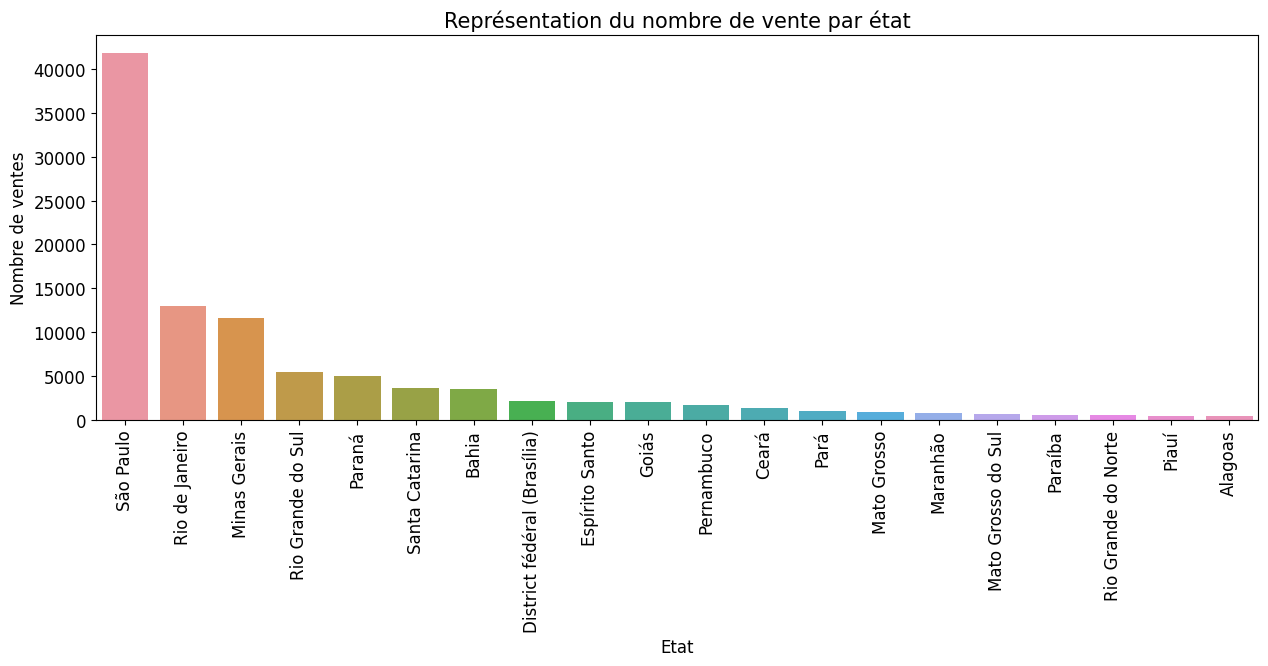

In [15]:
plt.figure(figsize=(15,5))

plt.title("Représentation du nombre de vente par état", fontsize=15)

sns.countplot(x='customer_state', data=df, order=df['customer_state'].value_counts().index[:20])
plt.xticks(rotation = 90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Etat', fontsize=12)
plt.ylabel("Nombre de ventes", fontsize=12)

plt.show()

### Clients par état

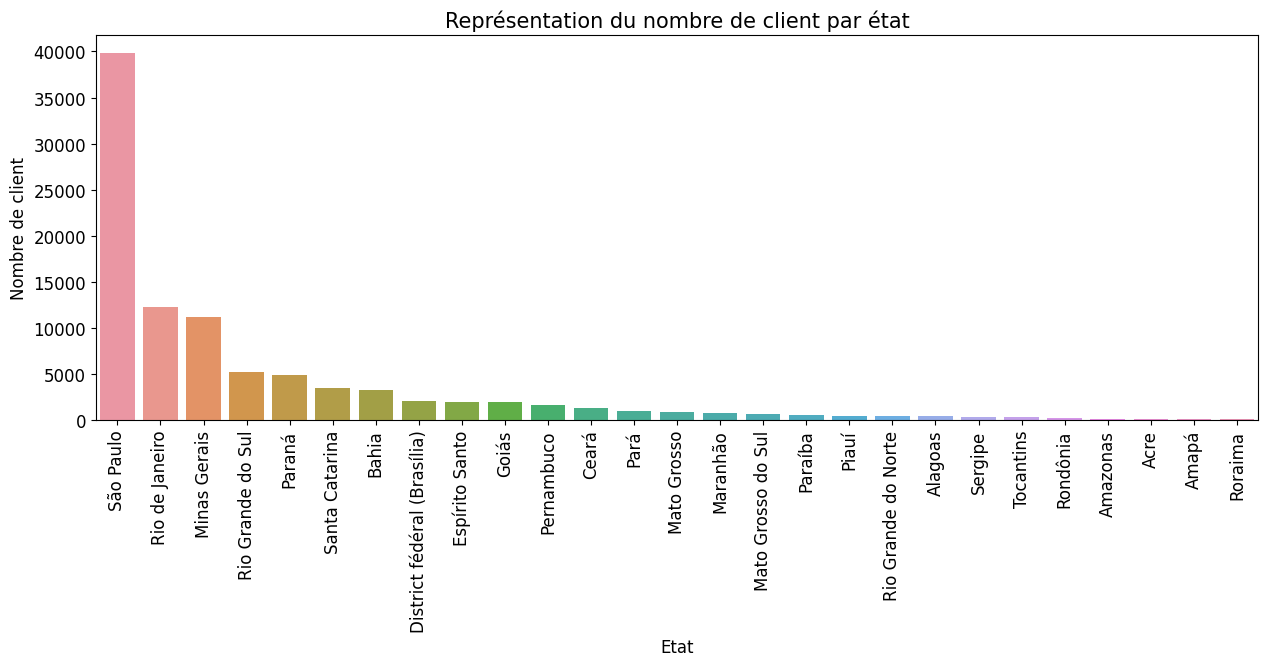

In [16]:
plt.figure(figsize=(15,5))

plt.title("Représentation du nombre de client par état", fontsize=15)

sns.barplot(x='customer_state', y='customer_id', data=df.groupby("customer_state")["customer_id"].nunique().reset_index().sort_values(by="customer_id", ascending=False))
plt.xticks(rotation = 90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Etat', fontsize=12)
plt.ylabel("Nombre de client", fontsize=12)

plt.show()

### Ventes en 2017 et 2019

In [17]:
df['annee'] = df['shipping_limit_date'].str[0:4]

In [18]:
df['annee']

0        2017
1        2017
2        2018
3        2018
4        2017
         ... 
99656    2018
99657    2018
99658    2017
99659    2017
99660    2018
Name: annee, Length: 99661, dtype: object

In [19]:
total_price_by_year_category = df[(df['annee'] == "2017") | (df['annee'] == "2018")]

In [20]:
total_price_by_year_category

order_id  order_item_id  \
0      00010242fe8c5a6d1ba2dd792cb16214              1   
1      00018f77f2f0320c557190d7a144bdd3              1   
2      000229ec398224ef6ca0657da4fc703e              1   
3      00024acbcdf0a6daa1e931b038114c75              1   
4      00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                 ...            ...   
99656  fffc94f6ce00a00581880bf54a75a037              1   
99657  fffcd46ef2263f404302a634eb57f7eb              1   
99658  fffce4705a9662cd70adb13d4a31832d              1   
99659  fffe18544ffabc95dfada21779c9644f              1   
99660  fffe41c64501cc87c801fd61db3f6244              1   

                             product_id                         seller_id  \
0      4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1      e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2      c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3      7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4      ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                 ...                               ...   
99656  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
99657  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
99658  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
99659  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
99660  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

       shipping_limit_date   price  freight_value  totalPrice  review_score  \
0      2017-09-19 09:45:35   58.90          13.29       72.19           5.0   
1      2017-05-03 11:05:13  239.90          19.93      259.83           4.0   
2      2018-01-18 14:48:30  199.00          17.87      216.87           5.0   
3      2018-08-15 10:10:18   12.99          12.79       25.78           4.0   
4      2017-02-13 13:57:51  199.90          18.14      218.04           5.0   
...                    ...     ...            ...         ...           ...   
99656  2018-05-02 04:11:01  299.99          43.41      343.40           5.0   
99657  2018-07-20 04:31:48  350.00          36.53      386.53           5.0   
99658  2017-10-30 17:14:25   99.90          16.95      116.85           5.0   
99659  2017-08-21 00:04:32   55.99           8.72       64.71           5.0   
99660  2018-06-12 17:10:13   43.00          12.79       55.79           5.0   

                            customer_id payment_type  \
0      3ce436f183e68e07877b285a838db11a  credit_card   
1      f6dd3ec061db4e3987629fe6b26e5cce  credit_card   
2      6489ae5e4333f3693df5ad4372dab6d3  credit_card   
3      d4eb9395c8c0431ee92fce09860c5a06  credit_card   
4      58dbd0b2d70206bf40e62cd34e84d795  credit_card   
...                                 ...          ...   
99656  b51593916b4b8e0d6f66f2ae24f2673d       boleto   
99657  84c5d4fbaf120aae381fad077416eaa0       boleto   
99658  29309aa813182aaddc9b259e31b870e6  credit_card   
99659  b5e6afd5a41800fdf401e0272ca74655  credit_card   
99660  96d649da0cc4ff33bb408b199d4c7dcf  credit_card   

       customer_zip_code_prefix          customer_city  customer_state  \
0                         28013  campos dos goytacazes  Rio de Janeiro   
1                         15775        santa fe do sul       São Paulo   
2                         35661          para de minas    Minas Gerais   
3                         12952                atibaia       São Paulo   
4                         13226        varzea paulista       São Paulo   
...                         ...                    ...             ...   
99656                     65077               sao luis        Maranhão   
99657                     81690               curitiba          Paraná   
99658                      4039              sao paulo       São Paulo   
99659                     13289                

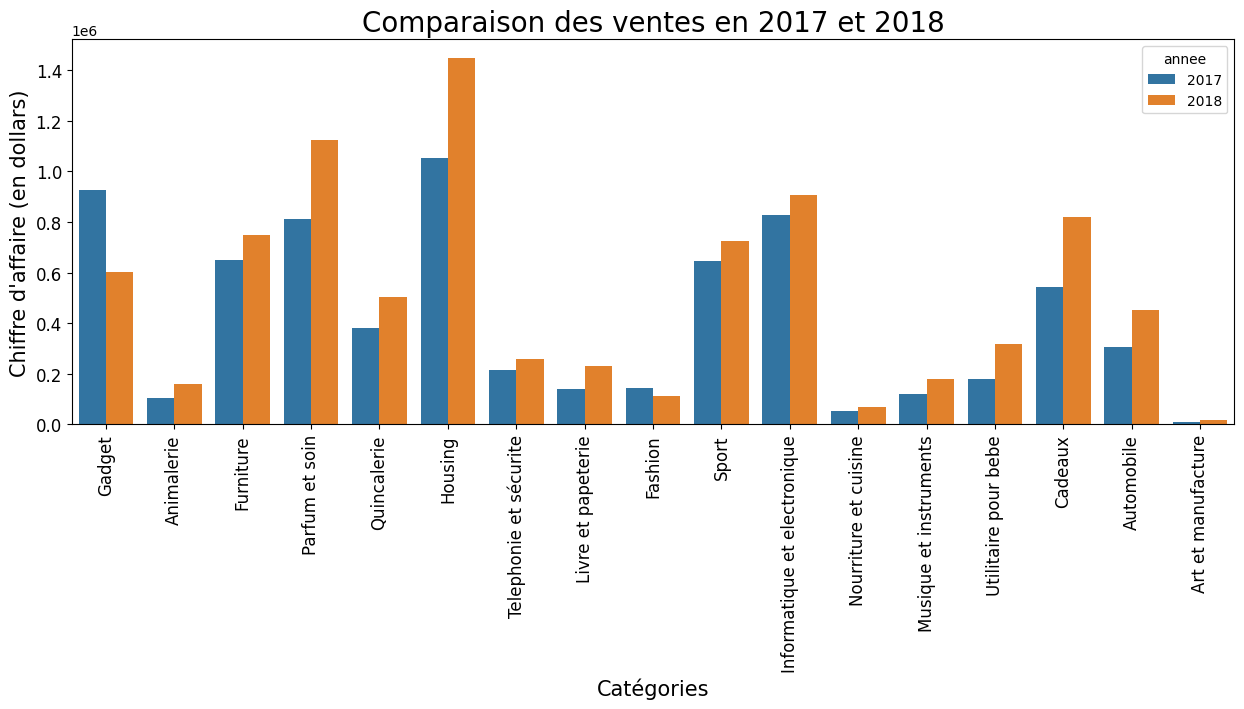

In [21]:
plt.figure(figsize=(15,5))

plt.title("Comparaison des ventes en 2017 et 2018", fontsize=20)
sns.barplot(x="product_category_name", y="totalPrice", hue="annee", data=total_price_by_year_category, estimator=sum, errorbar=None)
plt.xticks(rotation = 90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Catégories', fontsize=15)
plt.ylabel("Chiffre d'affaire (en dollars)", fontsize=15)

plt.show()

### Heatmap des corrélations

In [22]:
df_for_heatmap = pd.get_dummies(df[["totalPrice", "review_score", "payment_type"]], columns=["payment_type"])

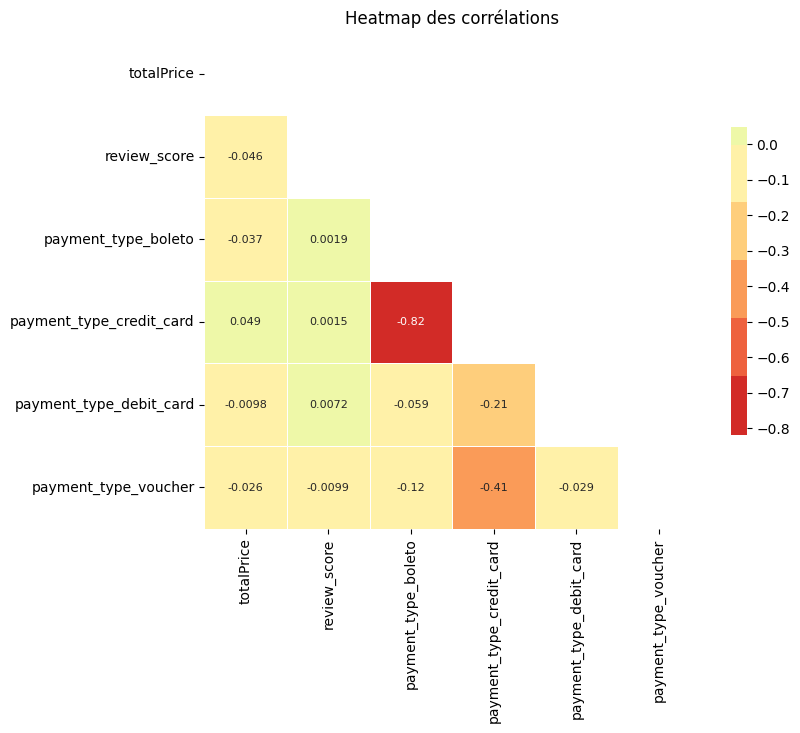

In [23]:
fig, ax = plt.subplots(figsize=(8,8))

# Calcul de la corrélation entre les variables
corr = df_for_heatmap.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

my_colors = sns.color_palette("RdYlGn", 10)

median = df_for_heatmap.median()
ax = sns.heatmap(corr, mask=mask, cmap=my_colors, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},  annot=True, annot_kws={"fontsize": 8})

plt.title("Heatmap des corrélations", fontsize=12)

# Augmentation de la taille des labels des axes X et Y
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

plt.show()

# Cartographie des ventes et du chiffre d'affaire

### Ventes en 2017 selon les états

In [24]:
data_ventes_2017 = df.loc[df['annee'] == "2017", ['customer_state', 'annee']]
data_ventes_2017  = data_ventes_2017.drop("annee", axis=1)

In [25]:
data_ventes_2017 = data_ventes_2017['customer_state'].value_counts().reset_index().rename(columns={"index":"Etats","customer_state":"Proportion des ventes"})
data_ventes_2017
total_vente = data_ventes_2017["Proportion des ventes"].sum()
data_ventes_2017['Proportion des ventes'] = round(data_ventes_2017['Proportion des ventes']/total_vente*100,2)

In [26]:
data_ventes_2017

Etats  Proportion des ventes
0                     São Paulo                  39.43
1                Rio de Janeiro                  13.82
2                  Minas Gerais                  11.94
3             Rio Grande do Sul                   5.93
4                        Paraná                   4.99
5                Santa Catarina                   3.76
6                         Bahia                   3.62
7                Espírito Santo                   2.15
8                         Goiás                   2.09
9   District fédéral (Brasília)                   2.02
10                   Pernambuco                   1.74
11                        Ceará                   1.46
12                         Pará                   1.13
13                  Mato Grosso                   0.98
14                     Maranhão                   0.84
15           Mato Grosso do Sul                   0.65
16                      Paraíba                   0.54
17          Rio Grande do Norte                   0.53
18                        Piauí                   0.51
19                      Alagoas                   0.47
20                      Sergipe                   0.41
21                     Rondônia                   0.30
22                    Tocantins                   0.28
23                     Amazonas                   0.17
24                         Acre                   0.12
25                        Amapá                   0.06
26                      Roraima                   0.04

In [27]:
# with open('geojson/bresil.geojson') as f:
#     geojson = json.load(f)

# m = folium.Map(location=[-14.235, -51.925], zoom_start=4)
# folium.Choropleth(
#     geo_data=geojson, # fichier JSON pour délimiter les États brésiliens
#     name='choropleth',
#     data=data_ventes_2017,
#     columns=["Etats", "Proportion des ventes"], # nom des colonnes contenant les données d'emplacement et de proportion
#     key_on='feature.properties.name', # clé pour fusionner les données avec le fichier JSON
#     fill_color='YlGn', # nuance de couleur pour représenter les proportions
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     line_weight=3, # ajoutez un poids à la ligne
#     line_color='black', # changez la couleur des lignes
#     legend_name='Sales Proportion (%)'
# ).add_to(m)

# # Ajouter une couche avec les noms des États
# folium.GeoJson(
#     geojson,
#     name='geojson',
#     style_function=lambda feature: {
#         'color': 'black',
#         'weight': 1,
#         'opacity': 0.5,
#         'fillOpacity': 0,
#         'dashArray': '5, 5'
#     },
#     highlight_function=lambda x: {'weight': 2, 'color': 'black'},
#     tooltip=folium.features.GeoJsonTooltip(fields=['name'], aliases=['État:'], localize=True),
#     show=False
# ).add_to(m)


# # Afficher la carte
# m

### Ventes en 2018 selon les états

In [28]:
data_ventes_2018 = df.loc[df['annee'] == "2018", ['customer_state', 'annee']]
data_ventes_2018  = data_ventes_2018.drop("annee", axis=1)

data_ventes_2018 = data_ventes_2018['customer_state'].value_counts().reset_index().rename(columns={"index":"Etats","customer_state":"Proportion des ventes"})
data_ventes_2018
total_vente = data_ventes_2018["Proportion des ventes"].sum()
data_ventes_2018['Proportion des ventes'] = round(data_ventes_2018['Proportion des ventes']/total_vente*100,2)

In [29]:
data_ventes_2018

Etats  Proportion des ventes
0                     São Paulo                  44.03
1                Rio de Janeiro                  12.28
2                  Minas Gerais                  11.48
3                        Paraná                   5.13
4             Rio Grande do Sul                   5.10
5                Santa Catarina                   3.48
6                         Bahia                   3.37
7   District fédéral (Brasília)                   2.24
8                Espírito Santo                   1.95
9                         Goiás                   1.95
10                   Pernambuco                   1.62
11                        Ceará                   1.26
12                  Mato Grosso                   0.89
13                         Pará                   0.85
14           Mato Grosso do Sul                   0.77
15                     Maranhão                   0.67
16                      Paraíba                   0.53
17                        Piauí                   0.49
18          Rio Grande do Norte                   0.48
19                      Alagoas                   0.37
20                    Tocantins                   0.30
21                      Sergipe                   0.29
22                     Rondônia                   0.20
23                     Amazonas                   0.13
24                        Amapá                   0.07
25                         Acre                   0.05
26                      Roraima                   0.04

In [30]:
# with open('geojson/bresil.geojson') as f:
#     geojson = json.load(f)

# m = folium.Map(location=[-14.235, -51.925], zoom_start=4)
# folium.Choropleth(
#     geo_data=geojson, # fichier JSON pour délimiter les États brésiliens
#     name='choropleth',
#     data=data_ventes_2018,
#     columns=["Etats", "Proportion des ventes"], # nom des colonnes contenant les données d'emplacement et de proportion
#     key_on='feature.properties.name', # clé pour fusionner les données avec le fichier JSON
#     fill_color='YlGn', # nuance de couleur pour représenter les proportions
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     line_weight=3, # ajoutez un poids à la ligne
#     line_color='black', # changez la couleur des lignes
#     legend_name='Sales Proportion (%)'
# ).add_to(m)

# # Ajouter une couche avec les noms des États
# folium.GeoJson(
#     geojson,
#     name='geojson',
#     style_function=lambda feature: {
#         'color': 'black',
#         'weight': 1,
#         'opacity': 0.5,
#         'fillOpacity': 0,
#         'dashArray': '5, 5'
#     },
#     highlight_function=lambda x: {'weight': 2, 'color': 'black'},
#     tooltip=folium.features.GeoJsonTooltip(fields=['name'], aliases=['État:'], localize=True),
#     show=False
# ).add_to(m)

# # Afficher la carte
# m

# RFM (Récence, Fréquence, Montant)

In [31]:
df_rfm = total_price_by_year_category

In [32]:
df_rfm['shipping_limit_date'] = pd.to_datetime(df_rfm['shipping_limit_date']).dt.date
df_rfm['shipping_limit_date']

/tmp/ipykernel_47309/2192674940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['shipping_limit_date'] = pd.to_datetime(df_rfm['shipping_limit_date']).dt.date


0        2017-09-19
1        2017-05-03
2        2018-01-18
3        2018-08-15
4        2017-02-13
            ...    
99656    2018-05-02
99657    2018-07-20
99658    2017-10-30
99659    2017-08-21
99660    2018-06-12
Name: shipping_limit_date, Length: 99339, dtype: object

In [33]:
df_rfm.groupby('customer_id')['shipping_limit_date'].max()

customer_id
00012a2ce6f8dcda20d059ce98491703    2017-11-21
000161a058600d5901f007fab4c27140    2017-07-20
0001fd6190edaaf884bcaf3d49edf079    2017-03-06
0002414f95344307404f0ace7a26f1d5    2017-08-23
000379cdec625522490c315e70c7a9fb    2018-04-10
                                       ...    
fffcb937e9dd47a13f05ecb8290f4d3e    2018-03-22
fffecc9f79fd8c764f843e9951b11341    2018-04-04
fffeda5b6d849fbd39689bb92087f431    2018-05-28
ffff42319e9b2d713724ae527742af25    2018-06-15
ffffa3172527f765de70084a7e53aae8    2017-09-08
Name: shipping_limit_date, Length: 94600, dtype: object

In [69]:
# Calculer la récence de chaque client (nombre de jours depuis leur dernier achat)
df_rfm['shipping_limit_date'] = pd.to_datetime(df_rfm['shipping_limit_date'])
df_rfm['recency'] = (pd.to_datetime('2018-12-31') - df_rfm.groupby('customer_id')['shipping_limit_date'].max()).dt.days
df_rfm['recency_pts']=df_rfm['recency'].apply(lambda x: 5 if x <= 91 else (4 if 91 < x <= 182 else (3 if 182 < x <= 273 else (2 if 273 < x <= 365 else 1))))
df_rfm

/tmp/ipykernel_47309/3660431240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['shipping_limit_date'] = pd.to_datetime(df_rfm['shipping_limit_date'])
/tmp/ipykernel_47309/3660431240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['recency'] = (pd.to_datetime('2018-12-31') - df_rfm.groupby('customer_id')['shipping_limit_date'].max()).dt.days
/tmp/ipykernel_47309/3660431240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

order_id  order_item_id  \
0      00010242fe8c5a6d1ba2dd792cb16214              1   
1      00018f77f2f0320c557190d7a144bdd3              1   
2      000229ec398224ef6ca0657da4fc703e              1   
3      00024acbcdf0a6daa1e931b038114c75              1   
4      00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                 ...            ...   
99656  fffc94f6ce00a00581880bf54a75a037              1   
99657  fffcd46ef2263f404302a634eb57f7eb              1   
99658  fffce4705a9662cd70adb13d4a31832d              1   
99659  fffe18544ffabc95dfada21779c9644f              1   
99660  fffe41c64501cc87c801fd61db3f6244              1   

                             product_id                         seller_id  \
0      4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1      e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2      c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3      7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4      ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                 ...                               ...   
99656  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
99657  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
99658  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
99659  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
99660  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

      shipping_limit_date   price  freight_value  totalPrice  review_score  \
0              2017-09-19   58.90          13.29       72.19           5.0   
1              2017-05-03  239.90          19.93      259.83           4.0   
2              2018-01-18  199.00          17.87      216.87           5.0   
3              2018-08-15   12.99          12.79       25.78           4.0   
4              2017-02-13  199.90          18.14      218.04           5.0   
...                   ...     ...            ...         ...           ...   
99656          2018-05-02  299.99          43.41      343.40           5.0   
99657          2018-07-20  350.00          36.53      386.53           5.0   
99658          2017-10-30   99.90          16.95      116.85           5.0   
99659          2017-08-21   55.99           8.72       64.71           5.0   
99660          2018-06-12   43.00          12.79       55.79           5.0   

                            customer_id  ... customer_zip_code_prefix  \
0      3ce436f183e68e07877b285a838db11a  ...                    28013   
1      f6dd3ec061db4e3987629fe6b26e5cce  ...                    15775   
2      6489ae5e4333f3693df5ad4372dab6d3  ...                    35661   
3      d4eb9395c8c0431ee92fce09860c5a06  ...                    12952   
4      58dbd0b2d70206bf40e62cd34e84d795  ...                    13226   
...                                 ...  ...                      ...   
99656  b51593916b4b8e0d6f66f2ae24f2673d  ...                    65077   
99657  84c5d4fbaf120aae381fad077416eaa0  ...                    81690   
99658  29309aa813182aaddc9b259e31b870e6  ...                     4039   
99659  b5e6afd5a41800fdf401e0272ca74655  ...                    13289   
99660  96d649da0cc4ff33bb408b199d4c7dcf  ...                    18605   

               customer_city  customer_state seller_zip_code_prefix  \
0      campos dos goytacazes  Rio de Janeiro                  27277   
1            santa fe do sul       São Paulo                   3471   
2              para de minas    Minas Gerais                  37564   
3                    atibaia       São Paulo                  14403   
4            varzea paulista       São Paulo                  87900   
...                      ...             ...                    ...   
99656               sao luis        Maranhão                  88303   
99657               curitib

In [47]:
# Calculer la fréquence de chaque client (nombre d'achats effectués)
frequency = df_rfm.groupby('customer_id')['order_id'].count()
frequency

customer_id
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
000379cdec625522490c315e70c7a9fb    1
                                   ..
fffcb937e9dd47a13f05ecb8290f4d3e    1
fffecc9f79fd8c764f843e9951b11341    3
fffeda5b6d849fbd39689bb92087f431    1
ffff42319e9b2d713724ae527742af25    1
ffffa3172527f765de70084a7e53aae8    1
Name: order_id, Length: 94600, dtype: int64

In [42]:
# Calculer le montant total dépensé par chaque client
monetary_value = df_rfm.groupby('customer_id')['totalPrice'].sum()
monetary_value

customer_id
00012a2ce6f8dcda20d059ce98491703    114.74
000161a058600d5901f007fab4c27140     67.41
0001fd6190edaaf884bcaf3d49edf079    195.42
0002414f95344307404f0ace7a26f1d5    179.35
000379cdec625522490c315e70c7a9fb    107.01
                                     ...  
fffcb937e9dd47a13f05ecb8290f4d3e     91.91
fffecc9f79fd8c764f843e9951b11341    244.08
fffeda5b6d849fbd39689bb92087f431     63.13
ffff42319e9b2d713724ae527742af25    214.13
ffffa3172527f765de70084a7e53aae8     45.50
Name: totalPrice, Length: 94600, dtype: float64

In [62]:
# Diviser chaque variable en segments égaux
recency_segments = pd.qcut(recency, q=5)
monetary_segments = pd.qcut(monetary_value, q=4)

In [63]:
monetary_segments.describe()

count               94600
unique                  4
top       (10.069, 62.83]
freq                23658
Name: totalPrice, dtype: object

In [56]:
frequence_segments.unique()

[(339.0, 467.0], (467.0, 721.0], (235.0, 339.0], (103.999, 235.0]]
Categories (4, interval[float64, right]): [(103.999, 235.0] < (235.0, 339.0] < (339.0, 467.0] < (467.0, 721.0]]

In [35]:
# Assigner un score à chaque segment en fonction de sa valeur pour chaque variable
rfm_table = pd.concat([recency_segments, frequency_segments, monetary_segments], axis=1)
rfm_table.columns = ['R', 'F', 'M']
rfm_table['RFM_score'] = rfm_table.R.astype(str) + rfm_table.F.astype(str) + rfm_table.M.astype(str)

# Segmenter les clients en fonction de leur score RFM
rfm_labels = ['Champions', 'Loyal Customers', 'Potential Loyalists', 'Promising']
rfm_table['RFM_label'] = pd.cut(rfm_table['RFM_score'].astype(int), bins=[111, 244, 344, 444], labels=rfm_labels)

# Afficher les résultats
print(rfm_table)

ValueError: invalid literal for int() with base 10: '(339.0, 468.0]nan(106.94, 182.588]'